In [2]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [3]:
#Upload
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
# 📥 Step 2: Load the Dataset
df = pd.read_csv("Mall_Customers.csv")  # Make sure this file is uploaded in your notebook environment
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# 🧼 Step 3: Select Only Useful Features for Clustering
# We're using Annual Income and Spending Score only
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [6]:
# 🔍 Step 4: Normalize the Features
# Important for distance-based algorithms like KMeans
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


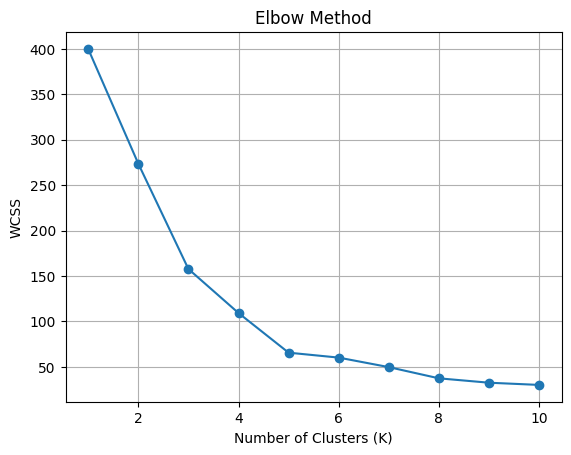

In [7]:
# 📉 Step 5: Elbow Method to Find Optimal K (Number of Clusters)
wcss = []  # WCSS = Within-Cluster Sum of Squares

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(data_scaled)
    wcss.append(km.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [8]:
# 🤖 Step 6: Apply KMeans with Chosen K (Assume K=5 from Elbow)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to original DataFrame
df['Cluster'] = clusters


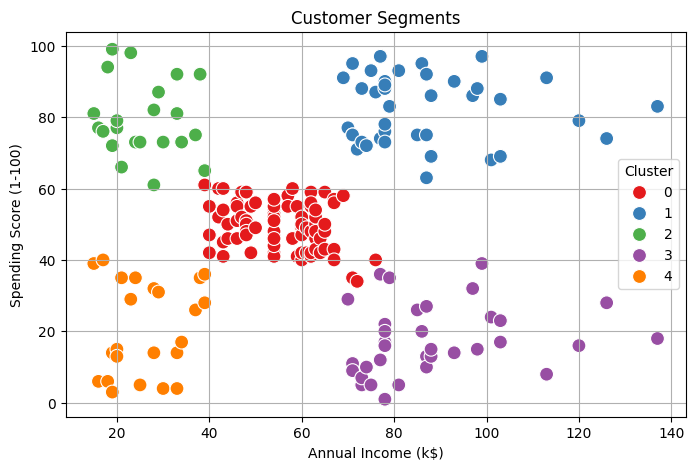

In [9]:
# 📈 Step 7: Visualize the Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.title("Customer Segments")
plt.grid()
plt.show()


In [10]:
# 🧠 Step 8: Evaluate the Clustering using Silhouette Score (Optional)
score = silhouette_score(data_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.5546571631111091
